In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress

In [7]:
df = pd.read_csv("thermistor_data.tsv",sep='\t')

In [8]:
df['T'] = df.loc[:,'temp c'] + 273.18

In [11]:
df['invT'] = 1/df['T']
df['lnR'] = np.log(df.resistance)

In [12]:
df

,resistance,temp c,T,invT,lnR
0,18800,1.00,274.18,0.003647,9.841612
1,19600,6.00,279.18,0.003582,9.883285
2,18700,6.00,279.18,0.003582,9.836279
3,17200,8.00,281.18,0.003556,9.752665
4,16200,11.90,285.08,0.003508,9.692767
5,13200,17.60,290.78,0.003439,9.487972
6,9700,25.90,299.08,0.003344,9.179881
7,14000,13.80,286.98,0.003485,9.546813
8,17200,8.02,281.20,0.003556,9.752665
9,20000,2.03,275.21,0.003634,9.903488


In [51]:
#Standard formula

In [15]:
def thermistor(lnR,a,b,c): return a+b*lnR+c*lnR**3

In [39]:
opt = curve_fit(thermistor,df.lnR,df.invT,p0=[1,1,1])

In [40]:
opt

(array([2.07827995e-04, 3.25514617e-04, 1.84962483e-07]),
 array([[ 8.61532751e-05, -1.34868815e-05,  4.88667516e-08],
        [-1.34868815e-05,  2.11166078e-06, -7.65358321e-09],
        [ 4.88667516e-08, -7.65358321e-09,  2.77568655e-11]]))

In [42]:
df['pred'] = thermistor(df.invT,opt[0][0],opt[0][1],opt[0][2])

In [44]:
((df.pred - df.invT)**2).sum()

0.0001448012078260727

In [35]:
plt.figure(0)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

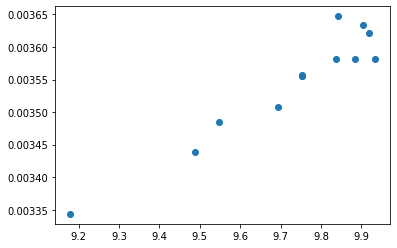

In [45]:
plt.plot(df.lnR,df.invT,'o')
#plt.plot(df.lnR,thermistor(df.invT,*opt[0]),'ro')

In [52]:
#Linear approximation

In [54]:
slope, intercept, r_value, p_value, std_err = linregress(df.resistance,df.loc[:,'T'])

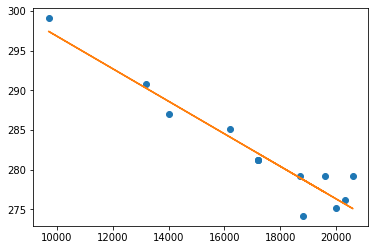

In [55]:
plt.plot(df.resistance,df.loc[:,'T'],'o')
plt.plot(df.resistance,intercept + slope*df.resistance)

In [56]:
slope, intercept

(-0.0020494915890188242, 317.31244437496093)